# Informatique scientifique série 11 - listes avancées, importation des données - Andrin Reber

In [1]:
import random
from IPython.display import clear_output # to clear 'console'
import time # to wait for print output
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for custom legend items

## Exercise 1 a)

In [2]:
#a
def transform(s):
    return ''.join([chr(ord(char)-32) if char in 'aeiou' else char for char in s])

print(transform('bonjour'))

bOnjOUr


In [3]:
#b
user_input = input('Enter a string: ')
while user_input != 'end':
    print(transform(user_input))
    time.sleep(0.3)
    user_input = input('Enter a string: ')

# time.sleep allows the print to appear before the next input.

Enter a string: all hail king grantelbart
All hAIl kIng grAntElbArt
Enter a string: end


## Exercise 2

In [4]:
list_of_words = ['Banana', 'Orange', 'Brazil', 'Hexafluorisopropanol', 'Bonjour', 'Exact', 'bouteille', 'spaghetti']

# list_of_words = list_of_words + ['hang', 'course', 'day', 'warm', 'passion', 'mastermind', 'funny', 'jest', 'late', 'tell', 'offense', 'wilderness', 'reputation', 'proposal', 'progressive', 'bowel', 'term', 'duke', 'define', 'minister']

def pick_word(words):
    return random.sample(words, 1)[0]

def censor_word(word, guessed_letters):
    return ''.join([char if char in guessed_letters else '_' for char in word])

def print_graphic(n):
    mask = [0,3,3,3,3,3,0,
            0,4,0,0,0,2,0,
            0,4,0,0,0,2,0,
            7,5,7,0,0,2,0,
            6,0,6,0,0,2,0,
            0,0,0,0,0,2,0,
            1,1,1,1,1,1,1]
    graphic = [' ','+','-','-','-','+','\n',
               ' ','|',' ',' ',' ','|','\n',
               ' ','O',' ',' ',' ','|','\n',
               '/','|','\\',' ',' ','|','\n',
               '/',' ','\\',' ',' ','|','\n',
               ' ',' ',' ',' ',' ','|','\n',
               '=','=','=','=','=','=','=',]
    print(''.join([graphic[i] if mask[i]<=n else ' ' for i in range(len(mask))]))

total_guesses = 7
number_of_guesses = 0
guessed_letters = ''
win = False
current_word = pick_word(list_of_words)
current_guess = ''
while number_of_guesses < total_guesses and not win and current_guess != 'end':
    current_guess = input('What letter will you guess?')
    while current_guess in guessed_letters:
        current_guess = input('You already guessed that letter. What other letter will you guess?')
    if current_guess.lower() not in current_word.lower():
        number_of_guesses += 1
    if len(current_guess) == 1:
        guessed_letters += current_guess.lower() + current_guess.upper()
    clear_output(wait=True)
    print(censor_word(current_word, guessed_letters))
    print_graphic(number_of_guesses)
    time.sleep(0.3)
    if censor_word(current_word, guessed_letters).lower() == current_word.lower() or current_guess.lower() == current_word.lower():
        win = True
        print('You won, the word was', current_word, 'and you guessed it with', number_of_guesses, 'errors.')

if not win:
    print('You lost, the word was', current_word, 'and you weren\'t able to guess it.')

_o__e___e
      
     |
     |
     |
     |
     |
You won, the word was bouteille and you guessed it with 2 errors.


## Exercise 3

In [5]:
S = [x**2 for x in range(0,70) if x%3==0]
print(S)

[0, 9, 36, 81, 144, 225, 324, 441, 576, 729, 900, 1089, 1296, 1521, 1764, 2025, 2304, 2601, 2916, 3249, 3600, 3969, 4356, 4761]


In [6]:
V = [2**(16-x) for x in range(0,17)]
print(V)

[65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]


In [7]:
M = [x for x in S if x%2==0]
print(M)

[0, 36, 144, 324, 576, 900, 1296, 1764, 2304, 2916, 3600, 4356]


In [8]:
R1 = [random.randint(-5,10) for i in range(30)]
print(R1)

[10, 0, 1, 1, 9, 5, 4, -1, 6, 2, 8, -1, 7, 6, 2, -3, 5, -2, 1, 2, 1, 5, 10, 7, -5, 2, 7, -4, 7, -4]


In [9]:
R2 = [random.randint(-10,5) for i in range(30)]
print(R2)

[1, -10, -7, -4, -8, -8, 4, -10, -5, -7, 2, -9, -7, 5, 0, -4, 0, 3, 4, 3, -5, -9, -8, -4, -6, -2, -7, -2, -9, -6]


In [10]:
R3 = [x for i, x in enumerate(R1) if x==R2[i]]
print(R3)

[4]


In [11]:
words = ['alligator', 'aléatoire', 'croissant', 'Joe Biden', 'Deez Nuts']
W1 = [x[-1].upper() for x in words]
print(W1)

['R', 'E', 'T', 'N', 'S']


In [12]:
W2 = [[i for i in x] for x in words]
print(W2)

[['a', 'l', 'l', 'i', 'g', 'a', 't', 'o', 'r'], ['a', 'l', 'é', 'a', 't', 'o', 'i', 'r', 'e'], ['c', 'r', 'o', 'i', 's', 's', 'a', 'n', 't'], ['J', 'o', 'e', ' ', 'B', 'i', 'd', 'e', 'n'], ['D', 'e', 'e', 'z', ' ', 'N', 'u', 't', 's']]


In [13]:
L1 = [1, 2, 3, 6.0869565218]
L2 = [6, 3, 9, 69]
L3 = [L1[i]*L2[i] for i in range(len(L1))]
print(L3)

[6, 6, 27, 420.00000000420005]


## Exercise 4

In [14]:
#a
file = open('Nationen.csv', 'r')
csvreader = csv.reader(file)
raw_data = list(csvreader)
data = np.array(raw_data[1:])

In [15]:
#b
for index, item in enumerate(data[0:10]):
    print(index, item[0], item[3])

0 Afghanistan 19082
1 Aegypten 52300
2 Angola 7474
3 Arabische Emiraten 1311
4 Argentinien 30500
5 Aethiopien 38024
6 Australien 15990
7 Bahamas 285
8 Bahrain 570
9 Bangladesh 103575


In [16]:
#c
print('Smallest surface area:', data[np.argmin(np.array(data[:,2], dtype=float), axis=0)][0], 'with' , data[np.argmin(np.array(data[:,2], dtype=float), axis=0)][2], 'km^2', '\nLargest surface area:', data[np.argmax(np.array(data[:,2], dtype=float), axis=0)][0], 'with' , data[np.argmax(np.array(data[:,2], dtype=float), axis=0)][2], 'km^2')

Smallest surface area: Gibraltar with 6 km^2 
Largest surface area: USSR with 22402200 km^2


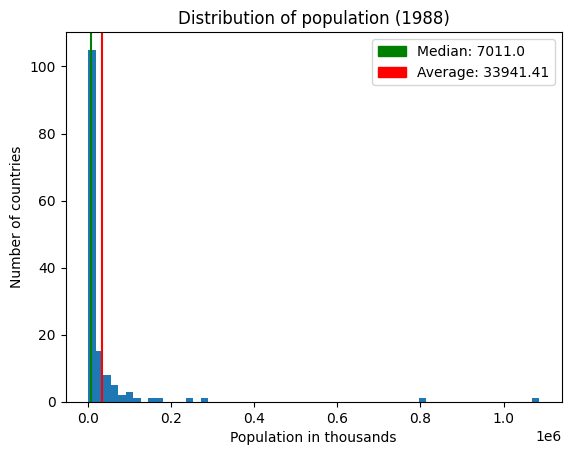

In [17]:
#d
plt.hist(np.array(data[:,3],dtype='float'), bins=60)
average = np.average(np.array(data[:,3],dtype='float'))
median = np.median(np.array(data[:,3],dtype='float'))
plt.axvline(x=average, c='red')
plt.axvline(x=median, c='green')
plt.xlabel('Population in thousands')
plt.ylabel('Number of countries')
plt.title('Distribution of population (1988)')

green_legend = mpatches.Patch(color='green', label=f'Median: {round(median, 2)}')
red_legend = mpatches.Patch(color='red', label=f'Average: {round(average, 2)}')
plt.legend(handles=[green_legend, red_legend])
plt.show()

TypeError: '>' not supported between instances of 'float' and 'builtin_function_or_method'

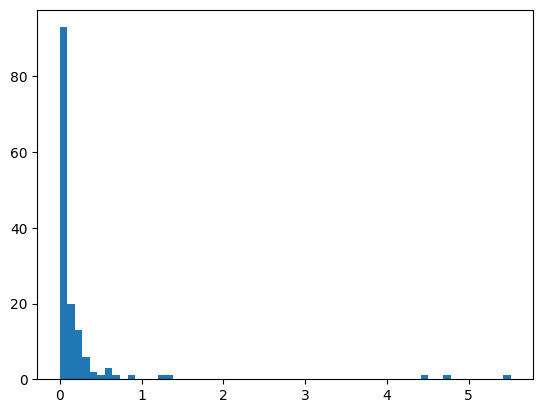

In [18]:
#e
population_density = np.array(data[:,3],dtype='float')/np.array(data[:,2],dtype='float')
plt.hist(population_density, bins=60)
min_index = np.argmin(population_density)
max_index = np.argmax(population_density)
plt.axvline(x=min, c='red')
plt.axvline(x=max, c='green')
plt.text(population_density[min_index]+0.5, 60, f'min: {round(population_density[min_index], 6)}\n{data[min_index, 0]}', c='red')
plt.text(population_density[max_index]-1.5, 60, f'max: {round(population_density[max_index], 6)}\n{data[max_index, 0]}', c='green')
plt.xlabel('Population density in thousands per km^2')
plt.ylabel('Number of countries')
plt.title('Distribution of population density (1988)')
plt.show()

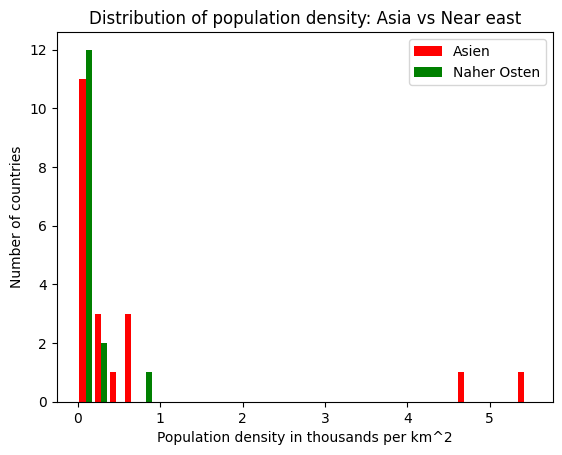

In [19]:
#f
plt.hist([[x for i, x in enumerate(population_density) if data[i][1]=='Asien'], [x for i, x in enumerate(population_density) if data[i][1]=='Naher Osten']], 30, histtype='bar', color=['red', 'green'], label=['Asien', 'Naher Osten'])
plt.legend()
plt.xlabel('Population density in thousands per km^2')
plt.ylabel('Number of countries')
plt.title('Distribution of population density: Asia vs Near east')
plt.show()

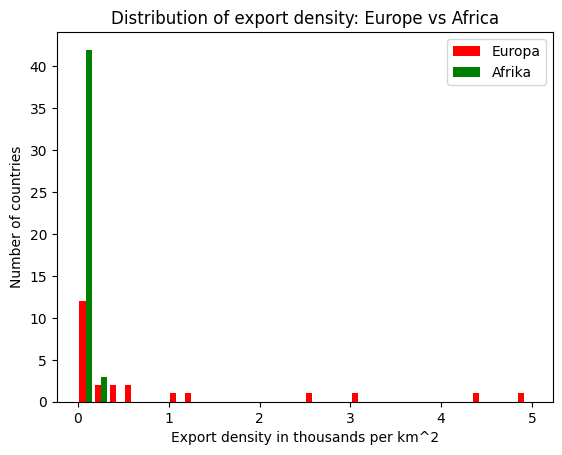

In [20]:
#g
export_density = np.array(data[:,5],dtype='float')/np.array(data[:,2],dtype='float')
plt.hist([[x for i, x in enumerate(export_density) if data[i][1]=='Europa'], [x for i, x in enumerate(export_density) if data[i][1]=='Afrika']], 30, histtype='bar', color=['red', 'green'], label=['Europa', 'Afrika'])
plt.legend()
plt.xlabel('Export density in thousands per km^2')
plt.ylabel('Number of countries')
plt.title('Distribution of export density: Europe vs Africa')
plt.show()

## Exercise 5

In [21]:
#a
def decode(m, n):
    return ''.join([chr((ord(char)-97-n)%26 +97) if 96<ord(char)<123 else char for char in [m[-i].lower() for i in range(1,len(m)+1)]])

#b
for n in range(26):
    print(decode('av rug zbqtavx sb rug qavyo rug rab qrlr anz fv tavx', n))

# n=13 >>> king is man eyed one the blind the of kingdom the in

#c already done

xvat vf zna rlrq bar gur oyvaq gur bs xvatqbz gur va
wuzs ue ymz qkqp azq ftq nxuzp ftq ar wuzspay ftq uz
vtyr td xly pjpo zyp esp mwtyo esp zq vtyrozx esp ty
usxq sc wkx oion yxo dro lvsxn dro yp usxqnyw dro sx
trwp rb vjw nhnm xwn cqn kurwm cqn xo trwpmxv cqn rw
sqvo qa uiv mgml wvm bpm jtqvl bpm wn sqvolwu bpm qv
rpun pz thu lflk vul aol ispuk aol vm rpunkvt aol pu
qotm oy sgt kekj utk znk hrotj znk ul qotmjus znk ot
pnsl nx rfs jdji tsj ymj gqnsi ymj tk pnslitr ymj ns
omrk mw qer icih sri xli fpmrh xli sj omrkhsq xli mr
nlqj lv pdq hbhg rqh wkh eolqg wkh ri nlqjgrp wkh lq
mkpi ku ocp gagf qpg vjg dnkpf vjg qh mkpifqo vjg kp
ljoh jt nbo fzfe pof uif cmjoe uif pg ljohepn uif jo
king is man eyed one the blind the of kingdom the in
jhmf hr lzm dxdc nmd sgd akhmc sgd ne jhmfcnl sgd hm
igle gq kyl cwcb mlc rfc zjglb rfc md iglebmk rfc gl
hfkd fp jxk bvba lkb qeb yifka qeb lc hfkdalj qeb fk
gejc eo iwj auaz kja pda xhejz pda kb gejczki pda ej
fdib dn hvi ztzy jiz ocz wgdiy ocz ja fdibyjh 

## Exercise 6

In [22]:
# Using the middle-most element as pivot:
# pivot = L[len(L)//2]

def quicksort(L):
    return ([] if L==[] else quicksort([x for x in L if x < L[len(L)//2]]) + [x for x in L if x == L[len(L)//2]] + quicksort([x for x in L if x > L[len(L)//2]]))

print(quicksort([3, 6, 12, 5, 3, 7, 1, 7, 2]))
print(quicksort([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]))
print(quicksort([1, 5.3, np.pi, 99999, -99999]))

[1, 2, 3, 3, 5, 6, 7, 7, 12]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[-99999, 1, 3.141592653589793, 5.3, 99999]
